# Visualize Zero-shot embeddings  
- NOTE : Text Embeddings은 Train/Val/Test 내 N개의 Nearest-Embeddings의 평균 값으로 할당. (For Visualization.)
   - Text Embeddings과 Image Embeddings은 극단적으로 멀리 떨어져 있어, 소수의 Sample인 Text Embeddings은 outlier로 취급돼 grid에서 벗어남.
   - 이것저것 두 임베딩 간 스케일을 맞춰주는 방법들(L2-hypersphere로 projection, image의 평균 norm으로 스케일링, ...)을 써봤으나 역시 grid에서 벗어.
   - N=10을 Default로 해놨는데, 그 외의 숫자는 딱히 시험해본적 없음 (돌려가며 띄워볼 필요는 있을 듯 하다).

In [1]:
from visualizer import *
from visualizer_supcon import *

/home/jinsu/anaconda3/envs/dl_mmd/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/jinsu/anaconda3/envs/dl_mmd/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/jinsu/anaconda3/envs/dl_mmd/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be 

# 1. Data/Model settings

In [2]:
opt = parse_option()

In [3]:
opt.dataset = 'waterbirds'
opt.tl_method = "linear_probing" # For zeroshot
# opt.tl_method = "contrastive_adapter"
opt.train_target = "class"
non_target = "spurious"

opt.text_embedding_dir = f"/home/jinsu/workstation/project/debiasing-multi-modal/data/embeddings_unnormalized/{opt.dataset}/clip_{opt.train_target}.json"
opt.text_spurious_embedding_dir = f"/home/jinsu/workstation/project/debiasing-multi-modal/data/embeddings_unnormalized/{opt.dataset}/clip_{non_target}.json"
opt.text_group_embedding_dir = f"/home/jinsu/workstation/project/debiasing-multi-modal/data/embeddings_unnormalized/{opt.dataset}/clip_group.json"
opt.image_embedding_dir = f"/home/jinsu/workstation/project/debiasing-multi-modal/data/embeddings_unnormalized/waterbirds/RN50/clip.json"
opt.data_dir="/home/jinsu/workstation/project/debiasing-multi-modal/data/waterbirds/waterbird_complete95_forest2water2"

In [4]:
(trainset, train_loader, val_loader, test_loader, 
 get_yp_func, train_group_ratio, classifier, criterion) = initialize_for_vis(opt)

> Start Transfer Learning using [linear_probing]
Load image embedding of Waterbirds: /home/jinsu/workstation/project/debiasing-multi-modal/data/embeddings_unnormalized/waterbirds/RN50/clip.json
/home/jinsu/workstation/project/debiasing-multi-modal/data/embeddings_unnormalized/waterbirds/RN50/clip.json
ㄴ Corresponding text embedding of Waterbirds: /home/jinsu/workstation/project/debiasing-multi-modal/data/embeddings_unnormalized/waterbirds/clip_class.json
Load Data Loader (train, validation, test)
/home/jinsu/workstation/project/debiasing-multi-modal/data/embeddings_unnormalized/waterbirds/RN50/clip.json
/home/jinsu/workstation/project/debiasing-multi-modal/data/embeddings_unnormalized/waterbirds/RN50/clip.json
/home/jinsu/workstation/project/debiasing-multi-modal/data/embeddings_unnormalized/waterbirds/RN50/clip.json
Training target : class (Land bird(0) / Water bird(1))
Off-the-shelf classifier : [Linear Classifier]


# 2. Visualize

## 2.1. Group

In [5]:
vis_handler = VisHandler(opt)
vis_handler.SaveWaterbirdsDatasets(trainset)
vis_handler.SaveWaterbirdsLoaders(train_loader, val_loader, test_loader)

# vis_handler.SaveTextEmbeddings(opt.text_embedding_dir) # class 임베딩 경로 (unnormalized!) (c.f. clip_inference_including_group_with_unnorm.py)
# vis_handler.SaveTextEmbeddings(opt.text_spurious_embedding_dir) # spurious 임베딩 경로 (unnormalized!) (c.f. clip_inference_including_group_with_unnorm.py)
vis_handler.SaveTextEmbeddings(opt.text_group_embedding_dir) # group 임베딩 경로 (unnormalized!) (c.f. clip_inference_including_group_with_unnorm.py)
print("Saved Embeddings : ", [feature.keys() for feature in vis_handler.text_embeddings])

vis_handler.SaveModel(classifier)
vis_handler.SaveUtils(criterion, get_yp_func, train_group_ratio)
vis_handler.SaveZeroShotResults(vis_handler.train_loader, vis_handler.val_loader, vis_handler.test_loader) # Zero-shot Prediction 수행

Saved Embeddings :  [dict_keys(['a photo of a landbird on land-background.']), dict_keys(['a photo of a landbird on water-background.']), dict_keys(['a photo of a waterbird on land-background.']), dict_keys(['a photo of a waterbird on water-background.'])]
Get ZS Acc. of train (class): {'weighted_mean_acc': 0.9274, 'worst_acc': 0.3929, 'acc_0_0': 0.9848, 'acc_0_1': 0.7663, 'acc_1_0': 0.3929, 'acc_1_1': 0.7938, 'mean_acc': 0.9274}
Get ZS Acc. of val (class): {'weighted_mean_acc': 0.9435, 'worst_acc': 0.3308, 'acc_0_0': 0.9893, 'acc_0_1': 0.7124, 'acc_1_0': 0.3308, 'acc_1_1': 0.8647, 'mean_acc': 0.7948}
Get ZS Acc. of test (class): {'weighted_mean_acc': 0.9292, 'worst_acc': 0.3956, 'acc_0_0': 0.9805, 'acc_0_1': 0.7206, 'acc_1_0': 0.3956, 'acc_1_1': 0.824, 'mean_acc': 0.7972}


> Saving activations


Running inference: 100%|██████████| 38/38 [00:00<00:00, 46.62it/s]


> Saving activations


Running inference: 100%|██████████| 10/10 [00:00<00:00, 14.90it/s]


> Saving activations


Running inference: 100%|██████████| 46/46 [00:02<00:00, 16.97it/s]


> Calculating [Group-wise] Statistics...


  0%|          | 0/4 [00:00<?, ?it/s]

save_id 2d_group_CLIP_ZS_group
Number of dataset : tr : [4795], val : [1199], test : [5794]
ㄴ total embedddings  :  (11788, 1024)
Add [text] embedding to umap-pool
> Calculate 10 Nearest samples for visualization of [text prompts]
ㄴ total embedddings  :  (11792, 1024)
Add [group] (mean) embedding to umap-pool
ㄴ total embedddings  :  (11807, 1024)
> Projection all the embeddings to [1024d l2-norm sphere]
> Start Umap fitting.... (# of samples 11807)(dim 1024)


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


standard [text]] ebd' shape: (4, 2)
standard [group] ebd' shape: (5, 2)
Saved umap to figure/2d_group_CLIP_ZS_group.png!


<Figure size 2400x1000 with 0 Axes>

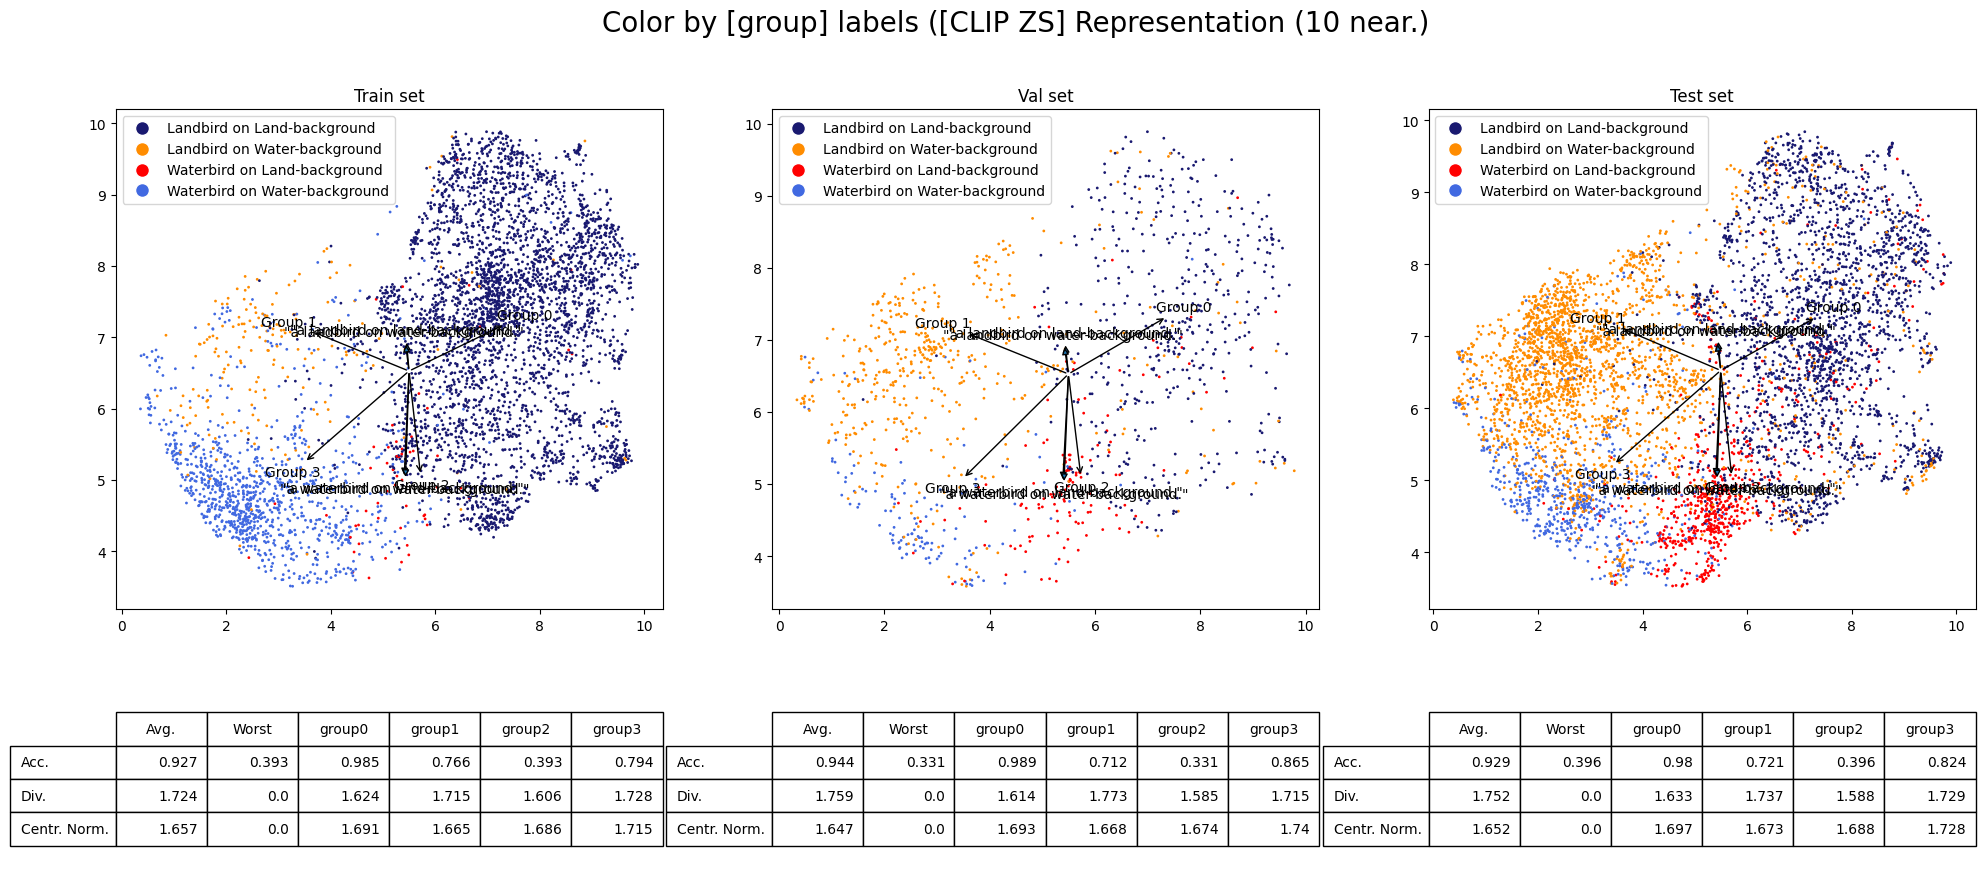

 25%|██▌       | 1/4 [00:32<01:36, 32.33s/it]

save_id 2d_target_CLIP_ZS_group
Number of dataset : tr : [4795], val : [1199], test : [5794]
ㄴ total embedddings  :  (11788, 1024)
Add [text] embedding to umap-pool
> Calculate 10 Nearest samples for visualization of [text prompts]
ㄴ total embedddings  :  (11792, 1024)
Add [group] (mean) embedding to umap-pool
ㄴ total embedddings  :  (11807, 1024)
> Projection all the embeddings to [1024d l2-norm sphere]
> Start Umap fitting.... (# of samples 11807)(dim 1024)
standard [text]] ebd' shape: (4, 2)
standard [group] ebd' shape: (5, 2)
Saved umap to figure/2d_target_CLIP_ZS_group.png!


<Figure size 2400x1000 with 0 Axes>

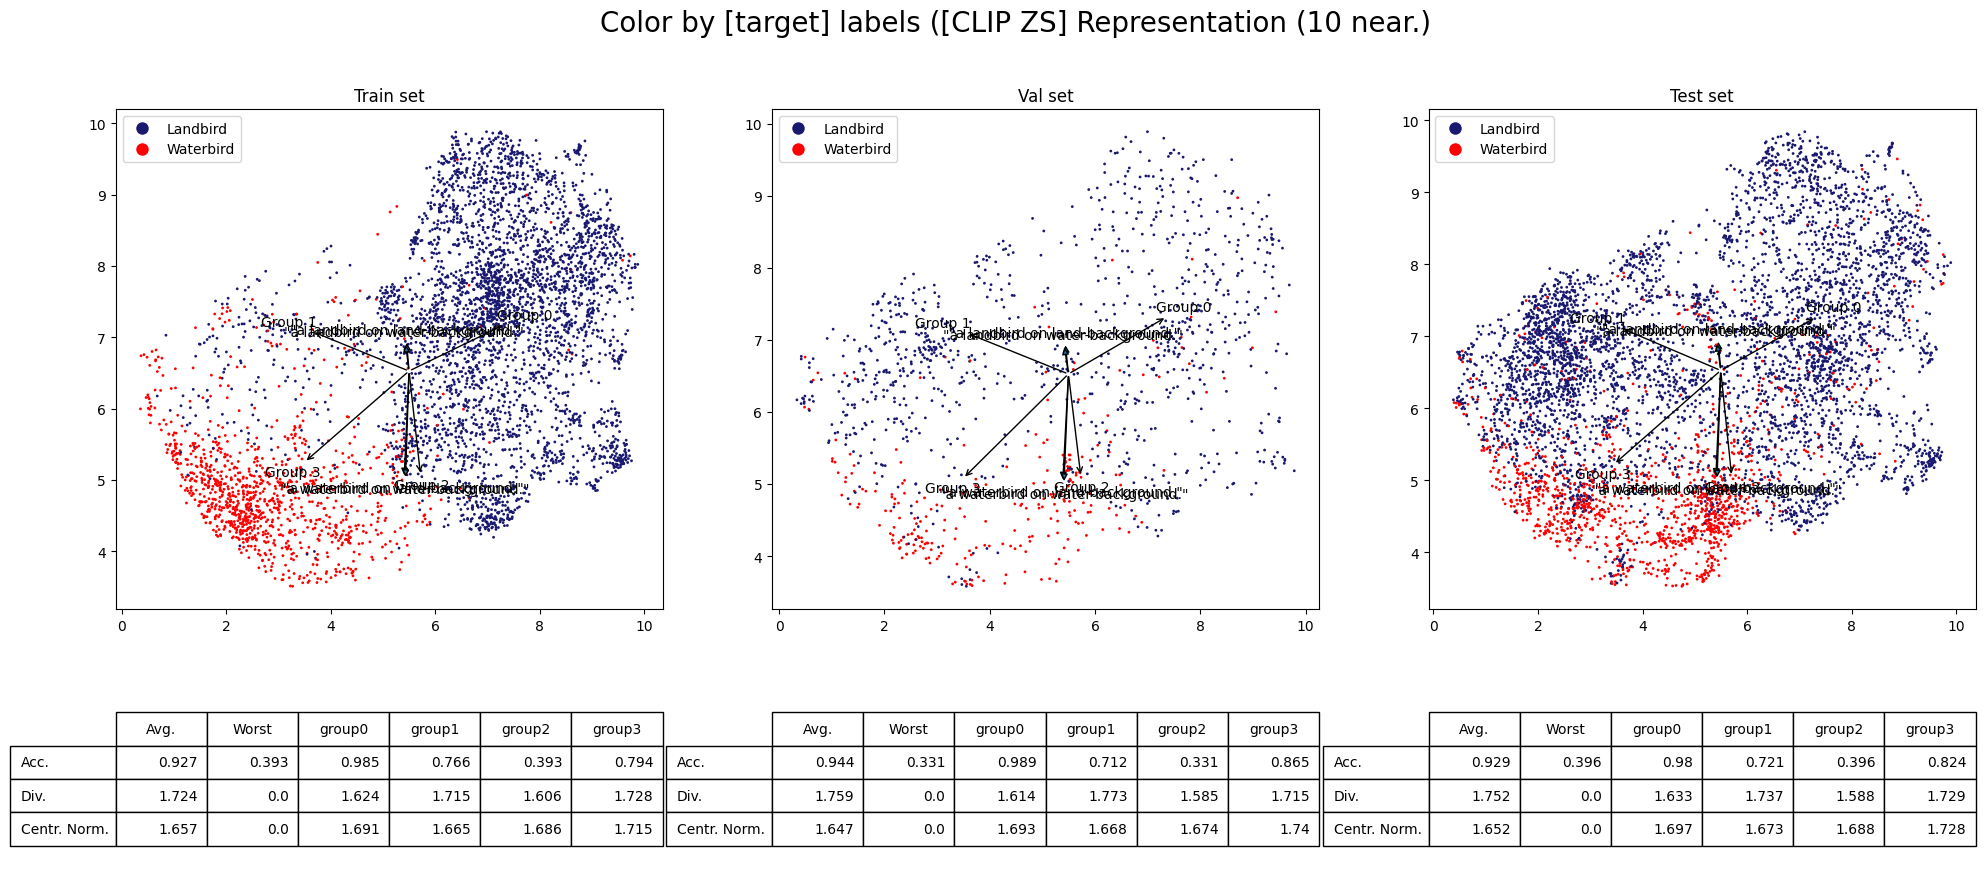

 50%|█████     | 2/4 [00:44<00:40, 20.21s/it]

save_id 2d_spurious_CLIP_ZS_group
Number of dataset : tr : [4795], val : [1199], test : [5794]
ㄴ total embedddings  :  (11788, 1024)
Add [text] embedding to umap-pool
> Calculate 10 Nearest samples for visualization of [text prompts]
ㄴ total embedddings  :  (11792, 1024)
Add [group] (mean) embedding to umap-pool
ㄴ total embedddings  :  (11807, 1024)
> Projection all the embeddings to [1024d l2-norm sphere]
> Start Umap fitting.... (# of samples 11807)(dim 1024)
standard [text]] ebd' shape: (4, 2)
standard [group] ebd' shape: (5, 2)
Saved umap to figure/2d_spurious_CLIP_ZS_group.png!


<Figure size 2400x1000 with 0 Axes>

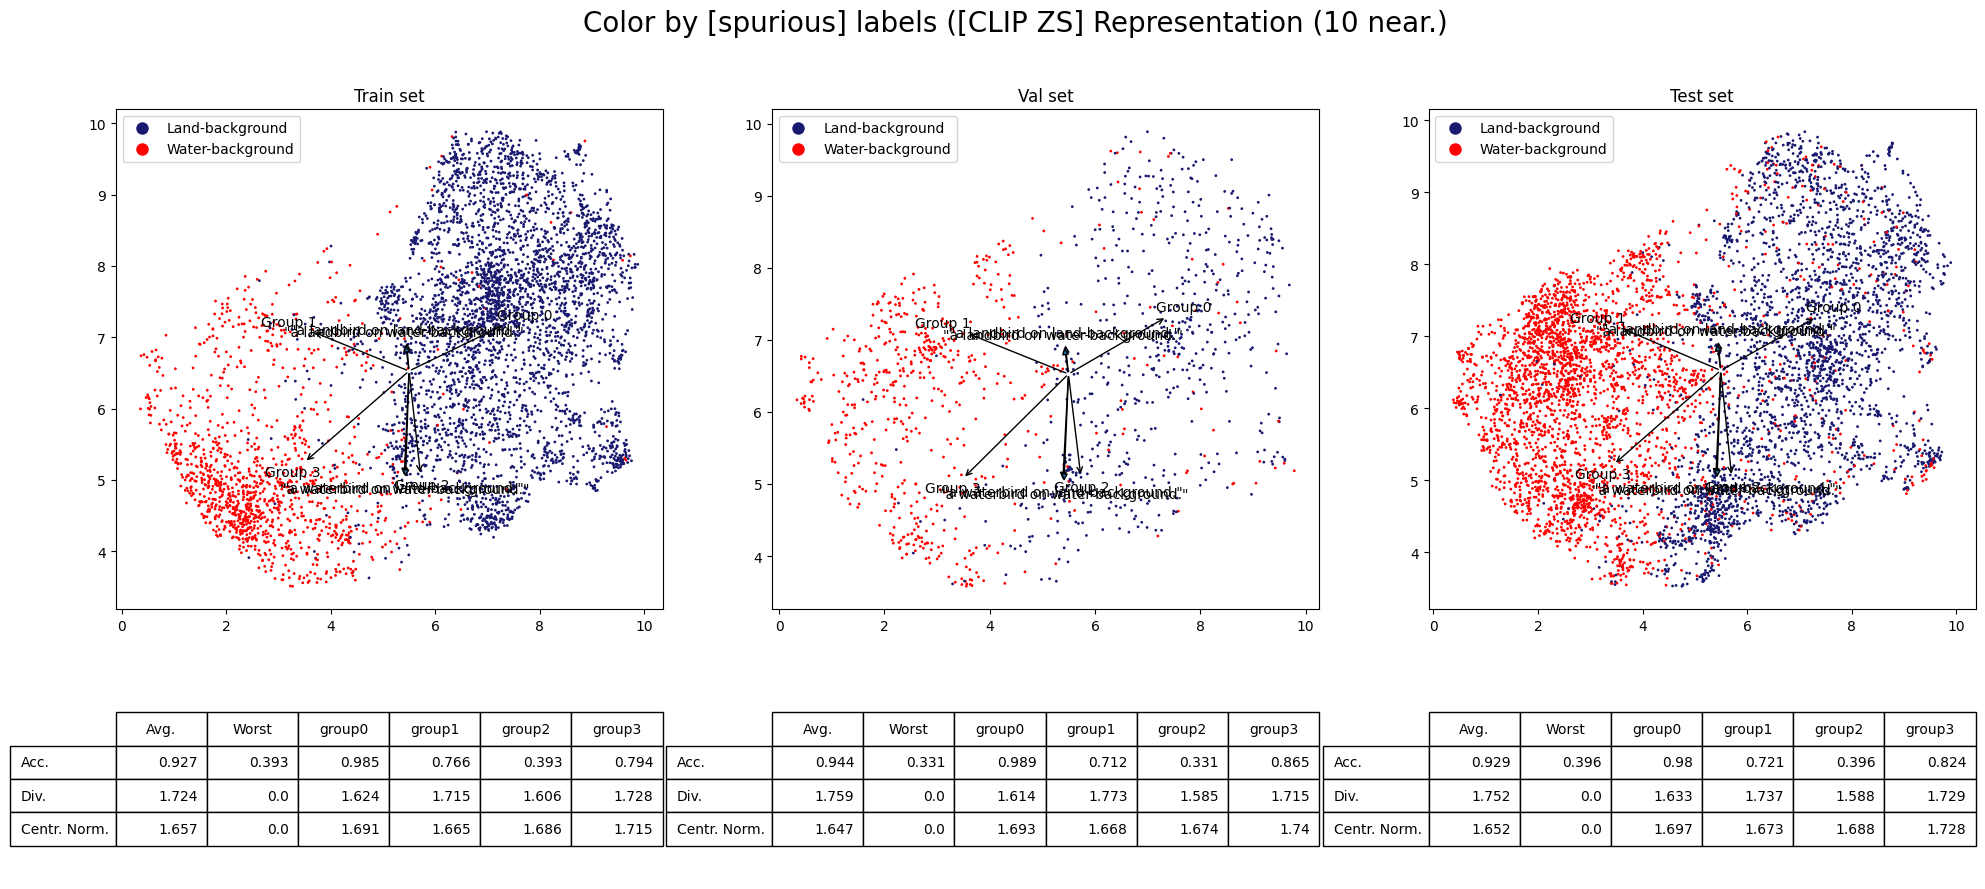

 75%|███████▌  | 3/4 [00:56<00:16, 16.60s/it]

save_id 2d_prediction_CLIP_ZS_group
Number of dataset : tr : [4795], val : [1199], test : [5794]
ㄴ total embedddings  :  (11788, 1024)
Add [text] embedding to umap-pool
> Calculate 10 Nearest samples for visualization of [text prompts]
ㄴ total embedddings  :  (11792, 1024)
Add [group] (mean) embedding to umap-pool
ㄴ total embedddings  :  (11807, 1024)
> Projection all the embeddings to [1024d l2-norm sphere]
> Start Umap fitting.... (# of samples 11807)(dim 1024)
standard [text]] ebd' shape: (4, 2)
standard [group] ebd' shape: (5, 2)
Saved umap to figure/2d_prediction_CLIP_ZS_group.png!


<Figure size 2400x1000 with 0 Axes>

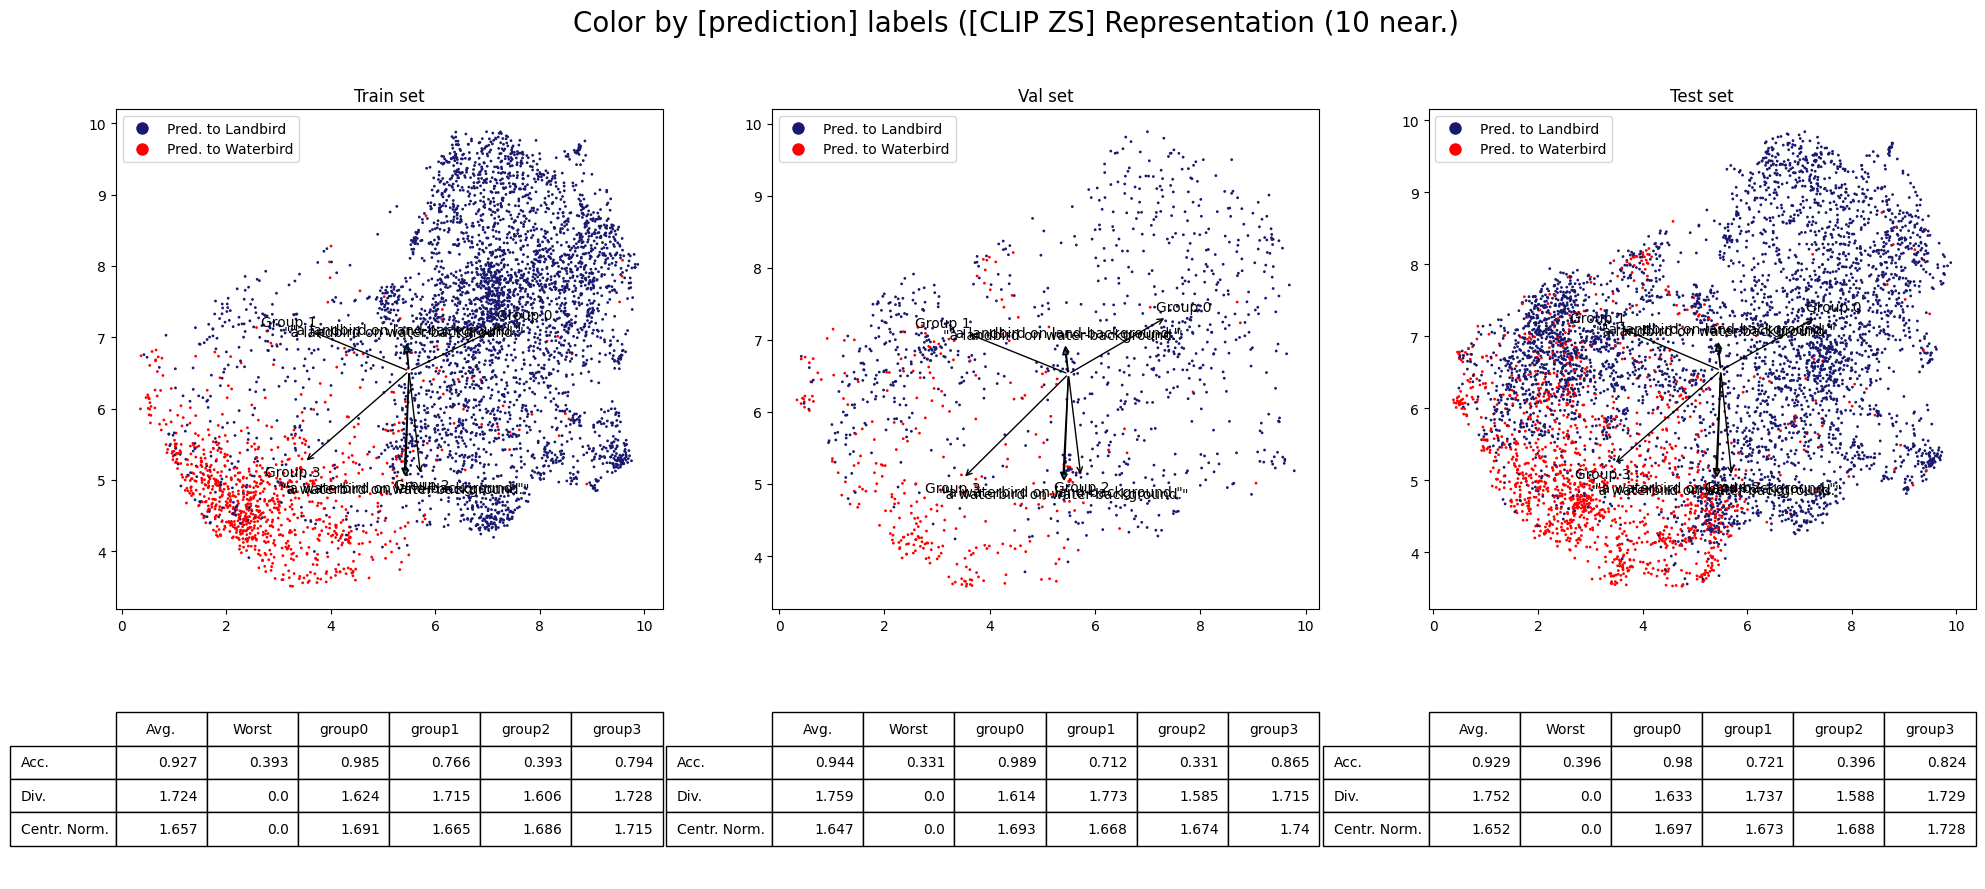

100%|██████████| 4/4 [01:07<00:00, 16.99s/it]


In [6]:
num_nn_text_ebd = 10 # 각각의 Text embedding에서 제일 가까운 [num_nn_text_ebd] 개수의 이미지 임베딩을 뽑아, 평균낸 임베딩을 해당 Text embedding의 visualization에 사용함. 
set_bbox=False # True: 가독성 그나마 좋아지나, 가끔 가릴 때 있음.
save_id_suffix ="CLIP_ZS_group" # 파일 저장용 ("figure/..._save_id_suffix.png")
vis_handler.VisRepAll(vis_handler.train_loader, vis_handler.val_loader, vis_handler.test_loader, reduced_dim=2,
                      text_ebd = vis_handler.text_embeddings, group_mean_ebd = True, figsize=(24, 10),
                      num_nn_text_ebd = num_nn_text_ebd, set_bbox = set_bbox, save_id_suffix = save_id_suffix)

## 2.2. Class / Spurious attributes

In [7]:
vis_handler = VisHandler(opt)
vis_handler.SaveWaterbirdsDatasets(trainset)
vis_handler.SaveWaterbirdsLoaders(train_loader, val_loader, test_loader)

vis_handler.SaveTextEmbeddings(opt.text_embedding_dir) # class 임베딩 경로 (unnormalized!) (c.f. clip_inference_including_group_with_unnorm.py)
vis_handler.SaveTextEmbeddings(opt.text_spurious_embedding_dir) # spurious 임베딩 경로 (unnormalized!) (c.f. clip_inference_including_group_with_unnorm.py)
# vis_handler.SaveTextEmbeddings(opt.text_group_embedding_dir) # group 임베딩 경로 (unnormalized!) (c.f. clip_inference_including_group_with_unnorm.py)
print("Saved Embeddings : ", [feature.keys() for feature in vis_handler.text_embeddings])

vis_handler.SaveModel(classifier)
vis_handler.SaveUtils(criterion, get_yp_func, train_group_ratio)
vis_handler.SaveZeroShotResults(vis_handler.train_loader, vis_handler.val_loader, vis_handler.test_loader) # Zero-shot Prediction 수행

Saved Embeddings :  [dict_keys(['a photo of a landbird.']), dict_keys(['a photo of a waterbird.']), dict_keys(['a photo of a land-background.']), dict_keys(['a photo of a water-background.'])]
Get ZS Acc. of train (class): {'weighted_mean_acc': 0.9274, 'worst_acc': 0.3929, 'acc_0_0': 0.9848, 'acc_0_1': 0.7663, 'acc_1_0': 0.3929, 'acc_1_1': 0.7938, 'mean_acc': 0.9274}
Get ZS Acc. of val (class): {'weighted_mean_acc': 0.9435, 'worst_acc': 0.3308, 'acc_0_0': 0.9893, 'acc_0_1': 0.7124, 'acc_1_0': 0.3308, 'acc_1_1': 0.8647, 'mean_acc': 0.7948}
Get ZS Acc. of test (class): {'weighted_mean_acc': 0.9292, 'worst_acc': 0.3956, 'acc_0_0': 0.9805, 'acc_0_1': 0.7206, 'acc_1_0': 0.3956, 'acc_1_1': 0.824, 'mean_acc': 0.7972}


> Saving activations


Running inference: 100%|██████████| 38/38 [00:00<00:00, 41.35it/s]


> Saving activations


Running inference: 100%|██████████| 10/10 [00:00<00:00, 14.27it/s]


> Saving activations


Running inference: 100%|██████████| 46/46 [00:00<00:00, 49.97it/s]


> Calculating [Group-wise] Statistics...


  0%|          | 0/4 [00:00<?, ?it/s]

save_id 2d_group_CLIP_ZS_class
Number of dataset : tr : [4795], val : [1199], test : [5794]
ㄴ total embedddings  :  (11788, 1024)
Add [text] embedding to umap-pool
> Calculate 10 Nearest samples for visualization of [text prompts]
ㄴ total embedddings  :  (11792, 1024)
Add [group] (mean) embedding to umap-pool
ㄴ total embedddings  :  (11807, 1024)
> Projection all the embeddings to [1024d l2-norm sphere]
> Start Umap fitting.... (# of samples 11807)(dim 1024)
standard [text]] ebd' shape: (4, 2)
standard [group] ebd' shape: (5, 2)
Saved umap to figure/2d_group_CLIP_ZS_class.png!


<Figure size 2400x1000 with 0 Axes>

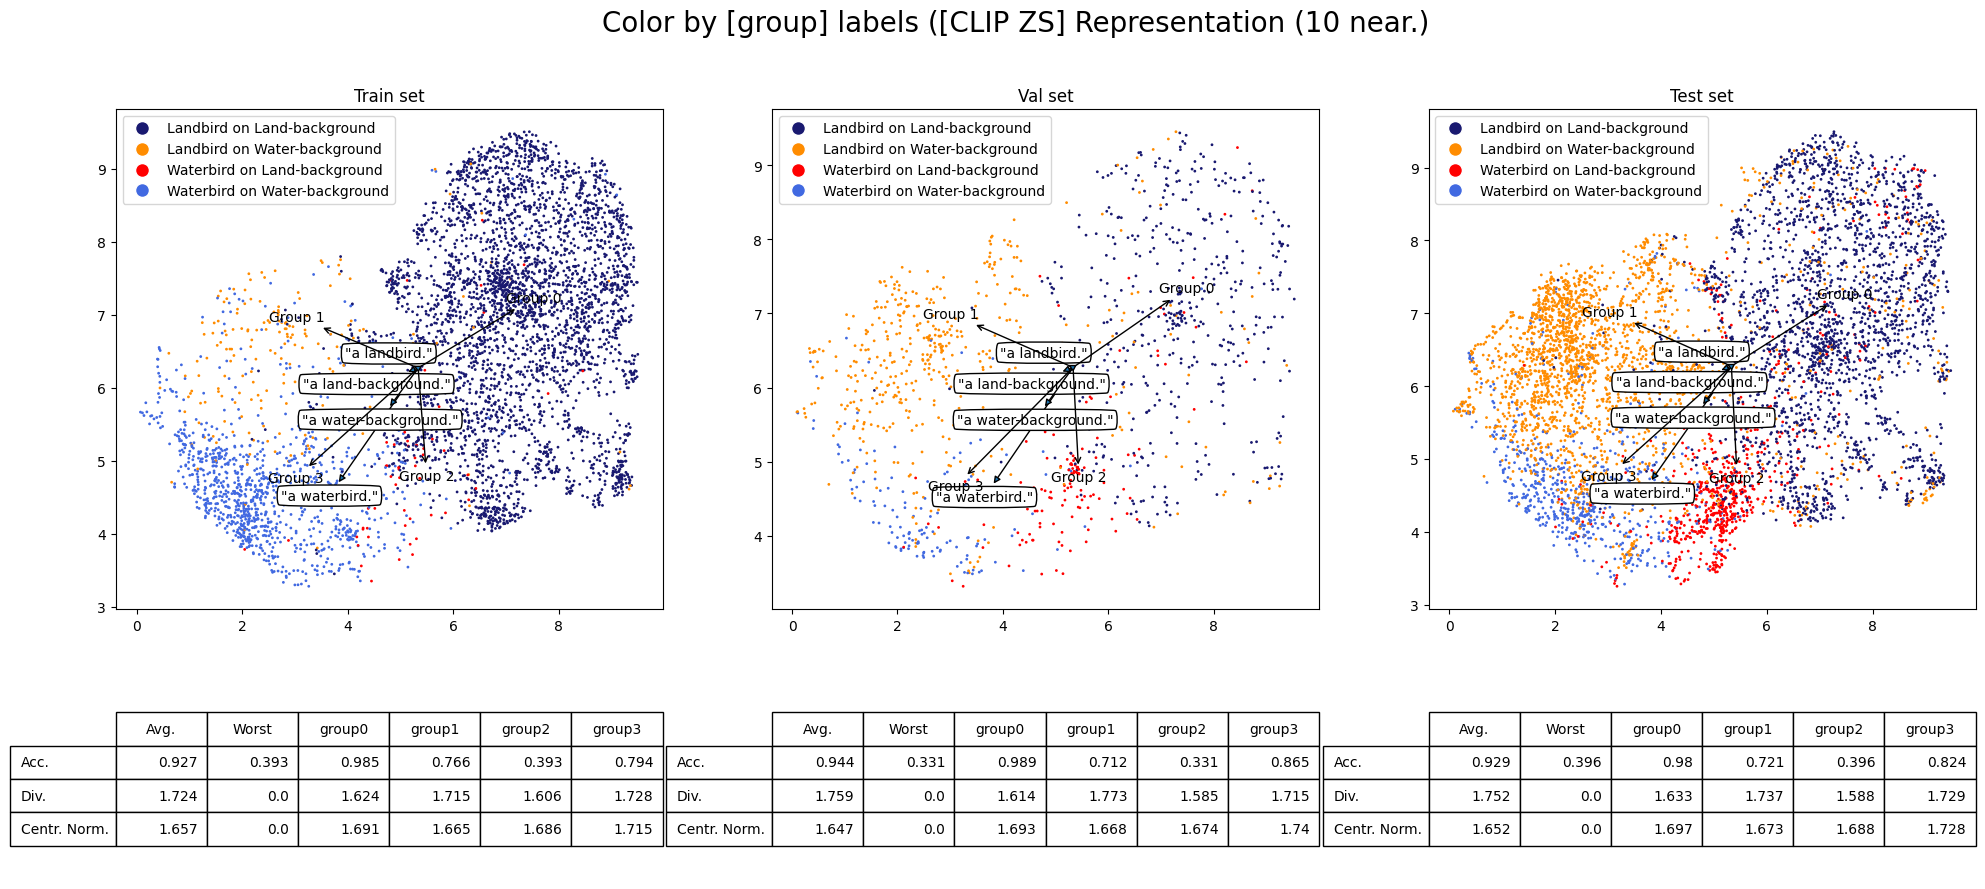

 25%|██▌       | 1/4 [00:13<00:39, 13.25s/it]

save_id 2d_target_CLIP_ZS_class
Number of dataset : tr : [4795], val : [1199], test : [5794]
ㄴ total embedddings  :  (11788, 1024)
Add [text] embedding to umap-pool
> Calculate 10 Nearest samples for visualization of [text prompts]
ㄴ total embedddings  :  (11792, 1024)
Add [group] (mean) embedding to umap-pool
ㄴ total embedddings  :  (11807, 1024)
> Projection all the embeddings to [1024d l2-norm sphere]
> Start Umap fitting.... (# of samples 11807)(dim 1024)
standard [text]] ebd' shape: (4, 2)
standard [group] ebd' shape: (5, 2)
Saved umap to figure/2d_target_CLIP_ZS_class.png!


<Figure size 2400x1000 with 0 Axes>

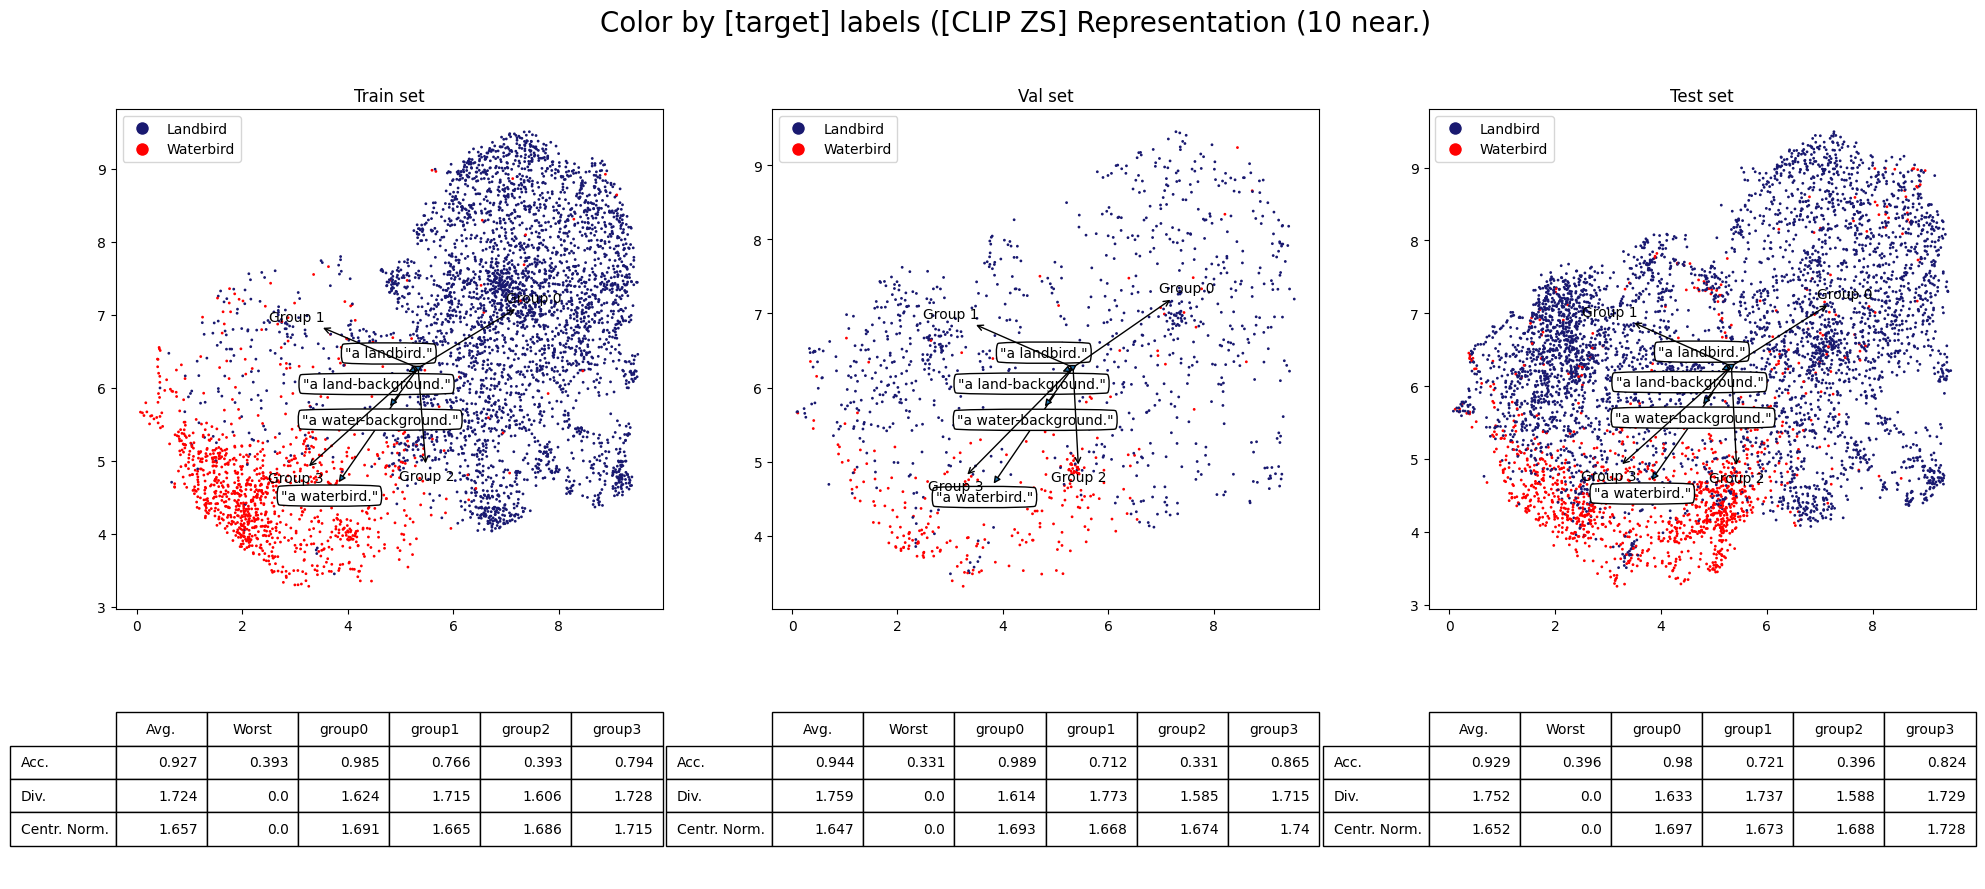

 50%|█████     | 2/4 [00:24<00:24, 12.33s/it]

save_id 2d_spurious_CLIP_ZS_class
Number of dataset : tr : [4795], val : [1199], test : [5794]
ㄴ total embedddings  :  (11788, 1024)
Add [text] embedding to umap-pool
> Calculate 10 Nearest samples for visualization of [text prompts]
ㄴ total embedddings  :  (11792, 1024)
Add [group] (mean) embedding to umap-pool
ㄴ total embedddings  :  (11807, 1024)
> Projection all the embeddings to [1024d l2-norm sphere]
> Start Umap fitting.... (# of samples 11807)(dim 1024)
standard [text]] ebd' shape: (4, 2)
standard [group] ebd' shape: (5, 2)
Saved umap to figure/2d_spurious_CLIP_ZS_class.png!


<Figure size 2400x1000 with 0 Axes>

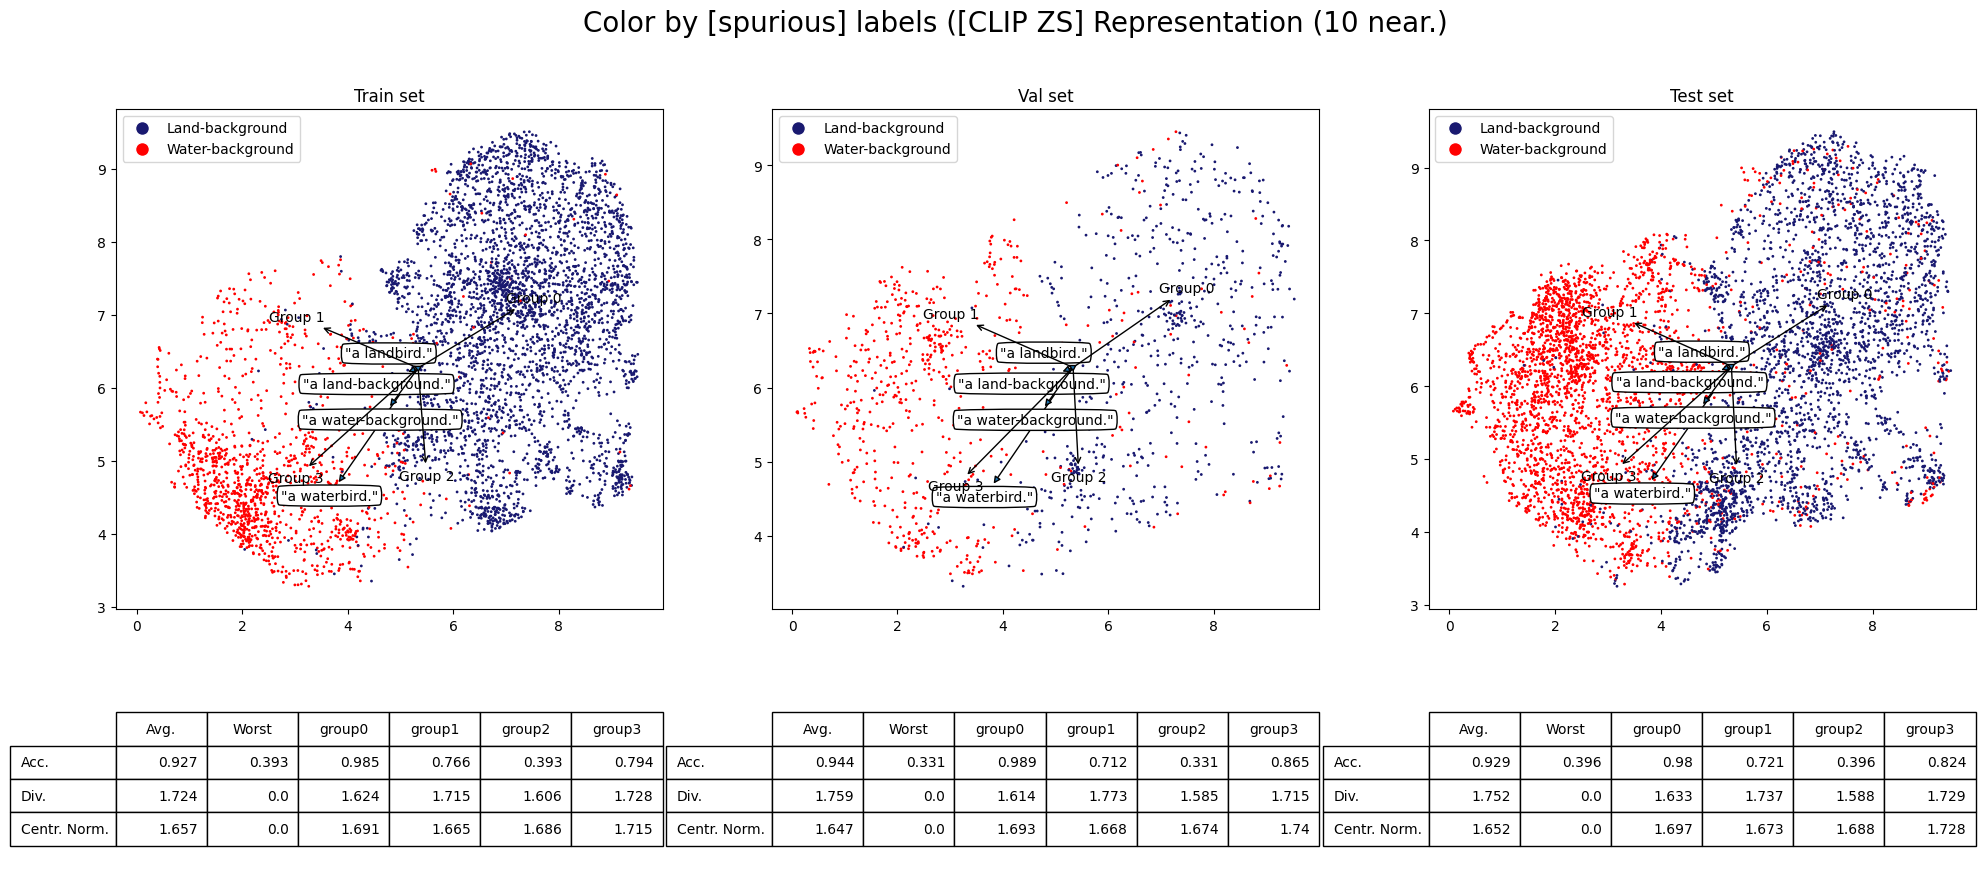

 75%|███████▌  | 3/4 [00:36<00:12, 12.02s/it]

save_id 2d_prediction_CLIP_ZS_class
Number of dataset : tr : [4795], val : [1199], test : [5794]
ㄴ total embedddings  :  (11788, 1024)
Add [text] embedding to umap-pool
> Calculate 10 Nearest samples for visualization of [text prompts]
ㄴ total embedddings  :  (11792, 1024)
Add [group] (mean) embedding to umap-pool
ㄴ total embedddings  :  (11807, 1024)
> Projection all the embeddings to [1024d l2-norm sphere]
> Start Umap fitting.... (# of samples 11807)(dim 1024)
standard [text]] ebd' shape: (4, 2)
standard [group] ebd' shape: (5, 2)
Saved umap to figure/2d_prediction_CLIP_ZS_class.png!


<Figure size 2400x1000 with 0 Axes>

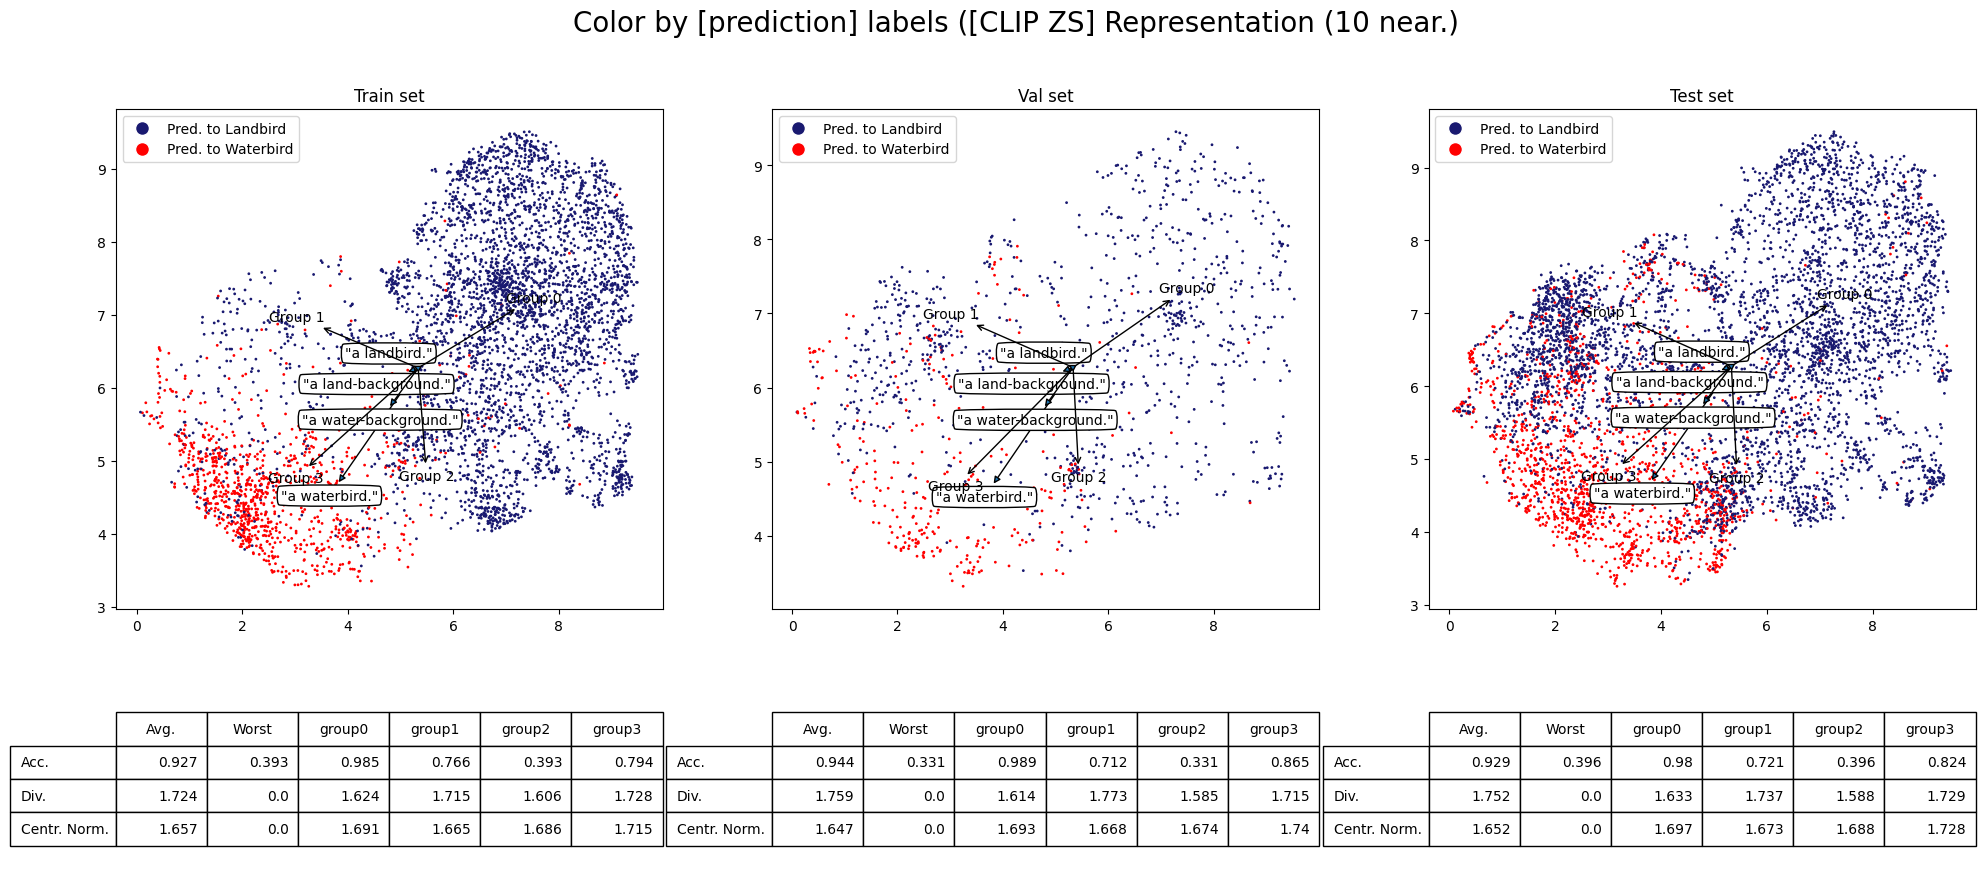

100%|██████████| 4/4 [00:50<00:00, 12.55s/it]


In [8]:
num_nn_text_ebd = 10 # 각각의 Text embedding에서 제일 가까운 [num_nn_text_ebd] 개수의 이미지 임베딩을 뽑아, 평균낸 임베딩을 해당 Text embedding의 visualization에 사용함. 
set_bbox=True # True: 가독성 그나마 좋아지나, 가끔 가릴 때 있음.
save_id_suffix ="CLIP_ZS_class" # 파일 저장용 ("figure/..._save_id_suffix.png")
vis_handler.VisRepAll(vis_handler.train_loader, vis_handler.val_loader, vis_handler.test_loader, reduced_dim=2,
                      text_ebd = vis_handler.text_embeddings, group_mean_ebd = True, figsize=(24, 10),
                      num_nn_text_ebd = num_nn_text_ebd, set_bbox = set_bbox, save_id_suffix = save_id_suffix)

### 참고: # of Nearest 1개 (즉, Text Prompt를 (Cosine-simliarty 기준) 가장 가까운 Sample의 Embedding으로 할당)

> Saving activations


Running inference: 100%|██████████| 38/38 [00:00<00:00, 41.35it/s]


> Saving activations


Running inference: 100%|██████████| 10/10 [00:00<00:00, 13.04it/s]


> Saving activations


Running inference: 100%|██████████| 46/46 [00:00<00:00, 49.02it/s]


> Calculating [Group-wise] Statistics...


  0%|          | 0/4 [00:00<?, ?it/s]

save_id 2d_group_CLIP_ZS_class
Number of dataset : tr : [4795], val : [1199], test : [5794]
ㄴ total embedddings  :  (11788, 1024)
Add [text] embedding to umap-pool
> Calculate 1 Nearest samples for visualization of [text prompts]
ㄴ total embedddings  :  (11792, 1024)
Add [group] (mean) embedding to umap-pool
ㄴ total embedddings  :  (11807, 1024)
> Projection all the embeddings to [1024d l2-norm sphere]
> Start Umap fitting.... (# of samples 11807)(dim 1024)
standard [text]] ebd' shape: (4, 2)
standard [group] ebd' shape: (5, 2)


<Figure size 2400x1000 with 0 Axes>

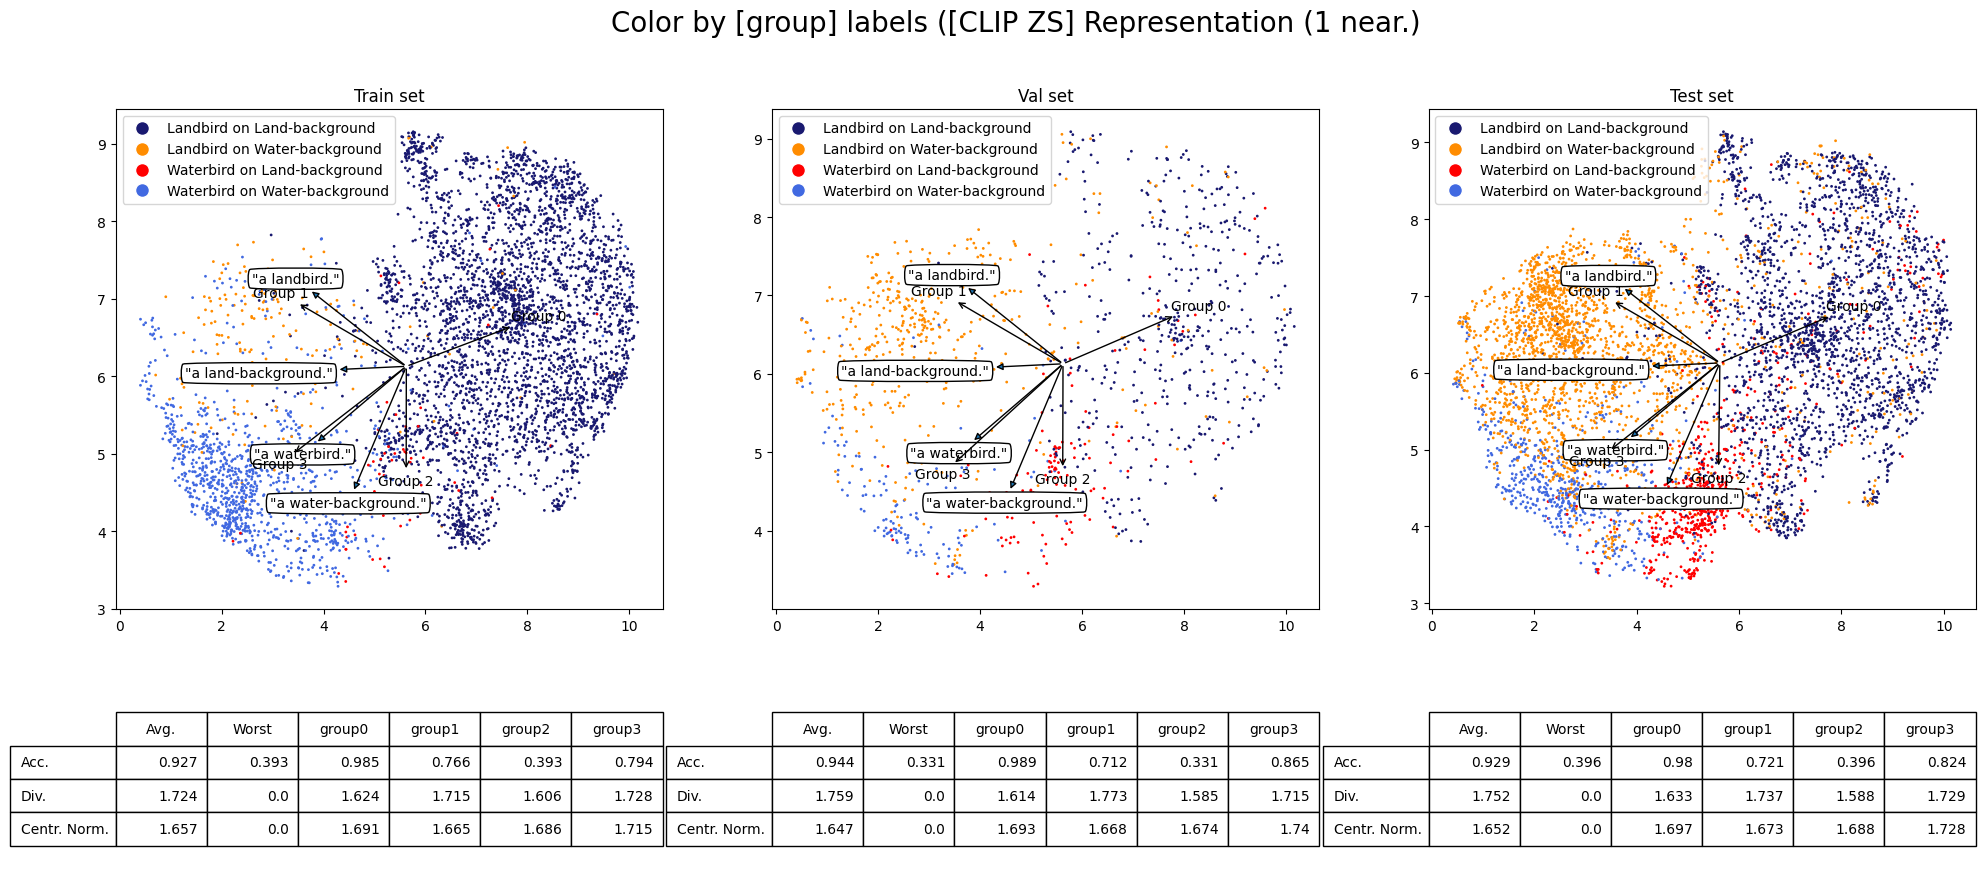

 25%|██▌       | 1/4 [00:09<00:29,  9.76s/it]

save_id 2d_target_CLIP_ZS_class
Number of dataset : tr : [4795], val : [1199], test : [5794]
ㄴ total embedddings  :  (11788, 1024)
Add [text] embedding to umap-pool
> Calculate 1 Nearest samples for visualization of [text prompts]
ㄴ total embedddings  :  (11792, 1024)
Add [group] (mean) embedding to umap-pool
ㄴ total embedddings  :  (11807, 1024)
> Projection all the embeddings to [1024d l2-norm sphere]
> Start Umap fitting.... (# of samples 11807)(dim 1024)
standard [text]] ebd' shape: (4, 2)
standard [group] ebd' shape: (5, 2)


<Figure size 2400x1000 with 0 Axes>

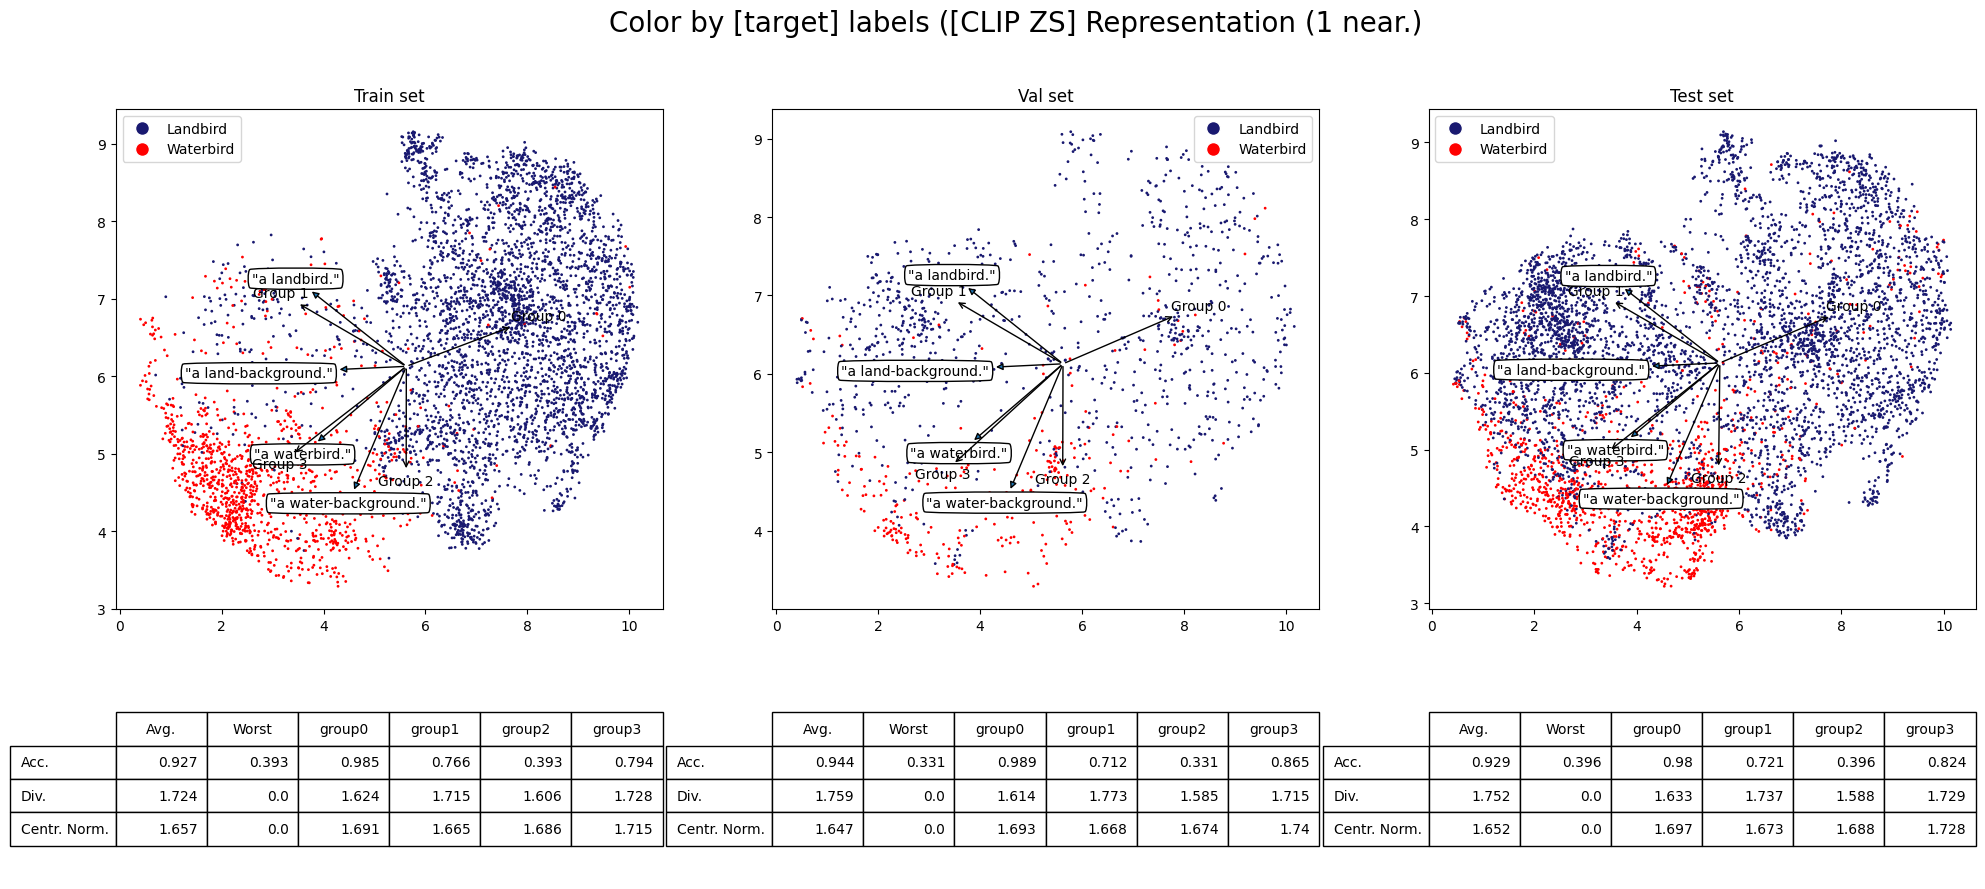

 50%|█████     | 2/4 [00:20<00:21, 10.57s/it]

save_id 2d_spurious_CLIP_ZS_class
Number of dataset : tr : [4795], val : [1199], test : [5794]
ㄴ total embedddings  :  (11788, 1024)
Add [text] embedding to umap-pool
> Calculate 1 Nearest samples for visualization of [text prompts]
ㄴ total embedddings  :  (11792, 1024)
Add [group] (mean) embedding to umap-pool
ㄴ total embedddings  :  (11807, 1024)
> Projection all the embeddings to [1024d l2-norm sphere]
> Start Umap fitting.... (# of samples 11807)(dim 1024)
standard [text]] ebd' shape: (4, 2)
standard [group] ebd' shape: (5, 2)


<Figure size 2400x1000 with 0 Axes>

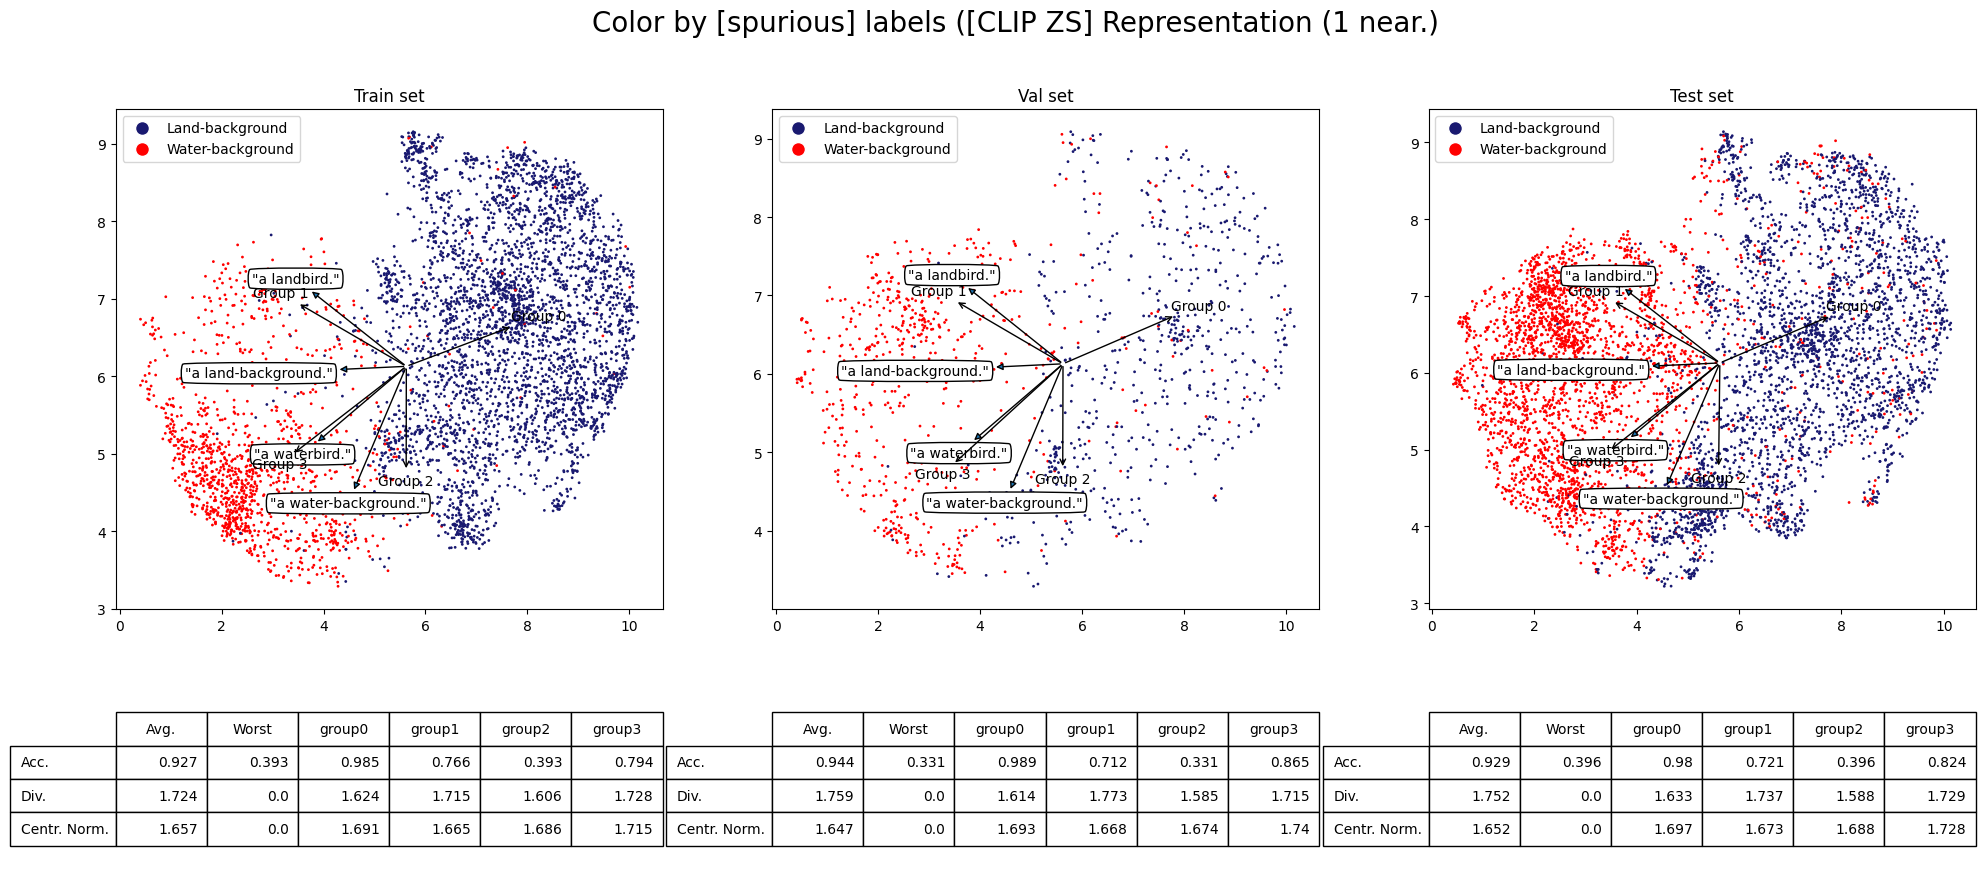

 75%|███████▌  | 3/4 [00:30<00:10, 10.09s/it]

save_id 2d_prediction_CLIP_ZS_class
Number of dataset : tr : [4795], val : [1199], test : [5794]
ㄴ total embedddings  :  (11788, 1024)
Add [text] embedding to umap-pool
> Calculate 1 Nearest samples for visualization of [text prompts]
ㄴ total embedddings  :  (11792, 1024)
Add [group] (mean) embedding to umap-pool
ㄴ total embedddings  :  (11807, 1024)
> Projection all the embeddings to [1024d l2-norm sphere]
> Start Umap fitting.... (# of samples 11807)(dim 1024)
standard [text]] ebd' shape: (4, 2)
standard [group] ebd' shape: (5, 2)


<Figure size 2400x1000 with 0 Axes>

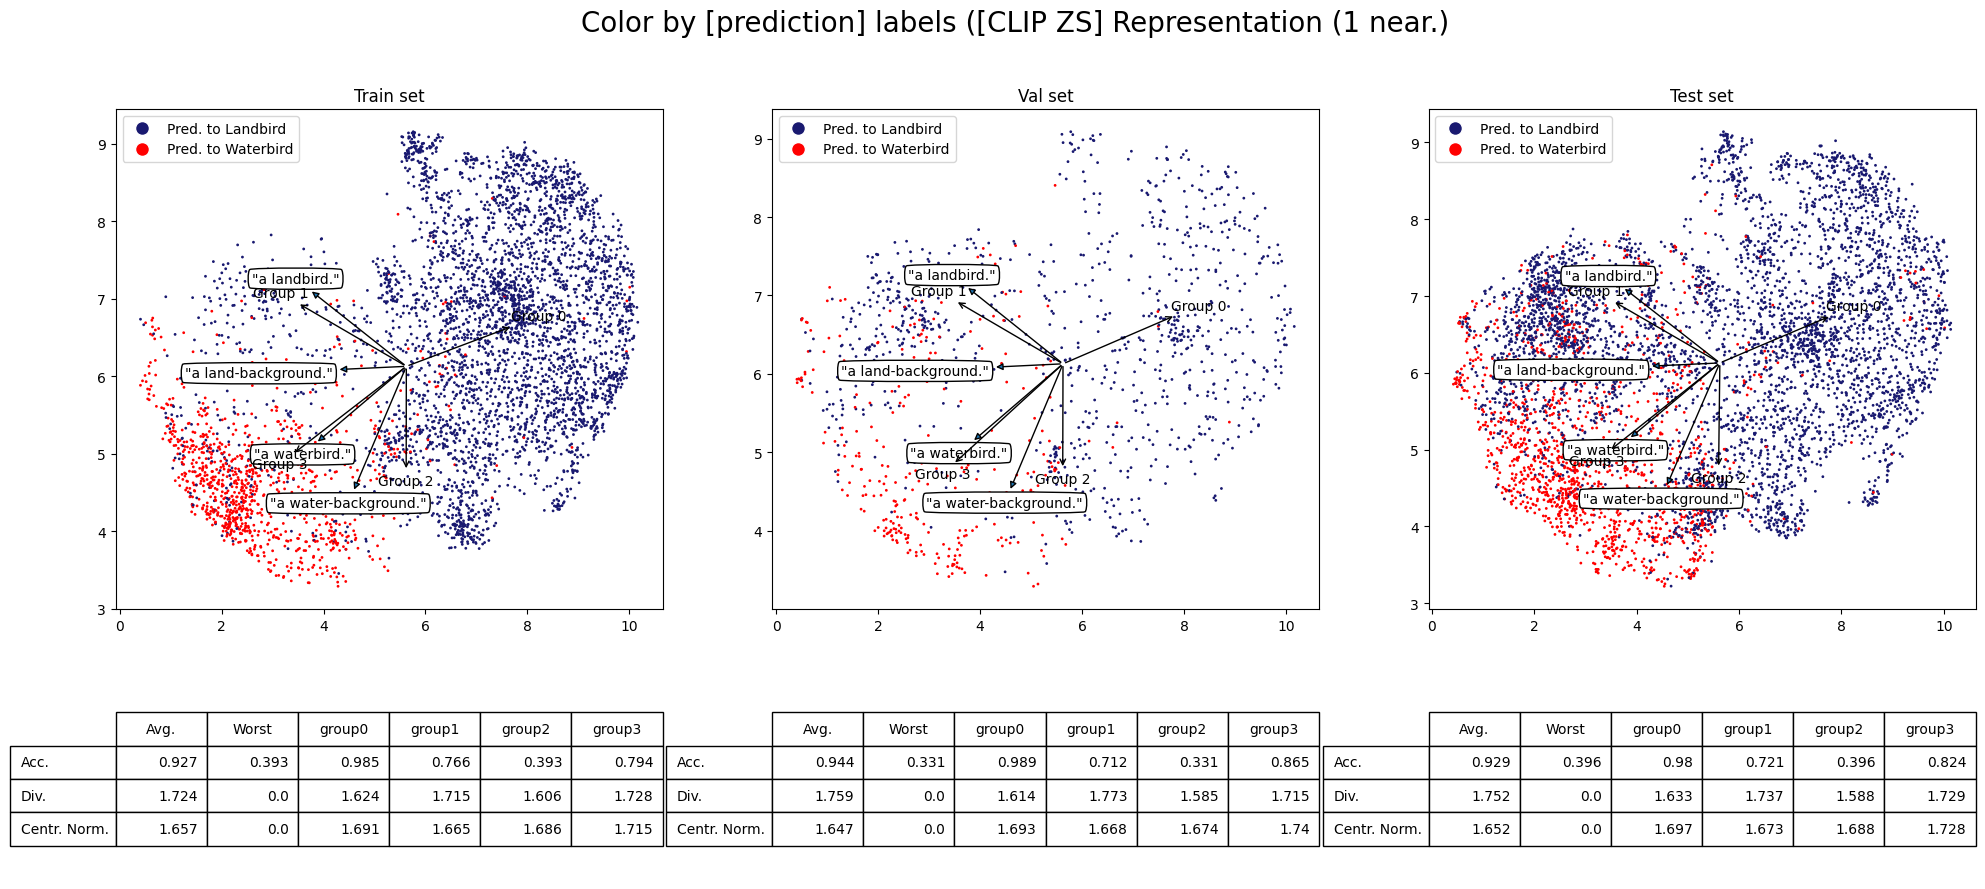

100%|██████████| 4/4 [00:39<00:00,  9.92s/it]


In [9]:
num_nn_text_ebd = 1 # 각각의 Text embedding에서 제일 가까운 [num_nn_text_ebd] 개수의 이미지 임베딩을 뽑아, 평균낸 임베딩을 해당 Text embedding의 visualization에 사용함. 
set_bbox=True # True: 가독성 그나마 좋아지나, 가끔 가릴 때 있음.
save_id_suffix ="CLIP_ZS_class" # 파일 저장용 ("figure/..._save_id_suffix.png")
vis_handler.VisRepAll(vis_handler.train_loader, vis_handler.val_loader, vis_handler.test_loader, reduced_dim=2,
                      text_ebd = vis_handler.text_embeddings, group_mean_ebd = True, figsize=(24, 10),
                      num_nn_text_ebd = num_nn_text_ebd, set_bbox = set_bbox, save_id_suffix = save_id_suffix, save=False)